<a href="https://colab.research.google.com/github/dTony33/Machine-Learning/blob/main/Bonus_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questions 1-3



PDF for 
[Questions from 1-3](https://github.com/dTony33/Machine-Learning/blob/main/bonus%20assignment.pdf)


In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from scipy import misc
img = cv2.imread('/content/input.png') 
height, width, channels = np.shape(img)
#pixel scaling
pixel_values=img.reshape((-1,3))
pixel_values = np.float32(pixel_values)
pixel_values


array([[103., 180., 219.],
       [116., 185., 230.],
       [110., 186., 226.],
       ...,
       [ 39.,  43.,  65.],
       [ 38.,  37.,  58.],
       [ 34.,  39.,  52.]], dtype=float32)

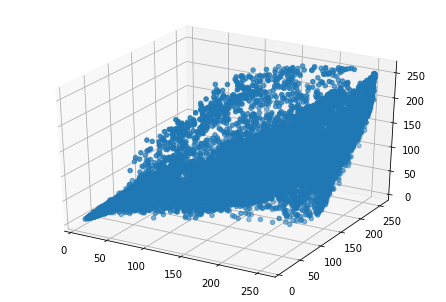

In [2]:
from mpl_toolkits.mplot3d import Axes3D
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [3]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [4]:
np.random.seed(42)

In [5]:
def closest_centroid(sample, centroids):
  distances = [euclidean_distance(sample, point) for point in centroids]
  closest_index = np.argmin(distances)
  return closest_index

In [6]:
def kmeans(k):
  max_iterations = 100
  clusters = [[]for _ in range(k)]
  centroids = []
  samples,features = pixel_values.shape
  random_indexes = np.random.choice(samples,k,replace=False)
  centroids = [pixel_values[index] for index in random_indexes] 
  for _ in range(max_iterations):
    for idx, sample in enumerate(pixel_values):
      centroid_idx = closest_centroid(sample, centroids)
      clusters[centroid_idx].append(idx)
    

    old = centroids
    centroids = np.zeros((k,features))
    for idx,cluster in enumerate(clusters):
      mean = np.mean(pixel_values[cluster],axis= 0)
      centroids[idx] = mean
    labels = np.empty(samples)
    for cluster_idx, cluster in enumerate(clusters):
      for sample_index in cluster:
        labels[sample_index] = cluster_idx
  return clusters,centroids,labels
  

In [7]:
clusters,centroids,labels = kmeans(3)


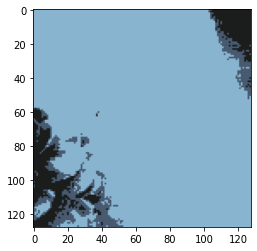

In [8]:
centers = np.uint8(centroids)
labels = labels.astype(int)
labels = labels.flatten()
output = centers[labels]
output = output.reshape(img.shape)
plt.imshow(output)
plt.show()

In [9]:
clusters,centroids,labels = kmeans(7)

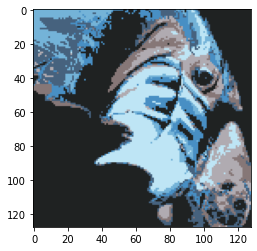

In [10]:
centers = np.uint8(centroids)
labels = labels.astype(int)
labels = labels.flatten()
output = centers[labels]
output = output.reshape(img.shape)
plt.imshow(output)
plt.show()

Reference https://medium.com/analytics-vidhya/image-segmentation-using-k-means-clustering-from-scratch-1545c896e38e